# **Welcome to my Notebook.**

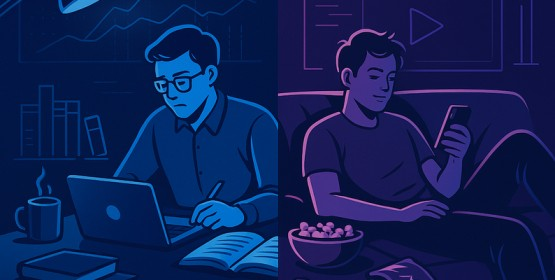

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Overview of the dataset

In [ ]:
df = pd.read_csv('/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv')
df = pd.DataFrame(df)
df.head()

In [ ]:
df.info()

In [ ]:
df['parental_education_level'].describe()

# 2. Filling missing values

In [ ]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [ ]:
df.isna().sum()

In [ ]:
df

In [ ]:
cat_col = df.select_dtypes(include='object').columns
cat_col = [col for col in cat_col]
cat_col.remove('student_id')
cat_col

# 3. Visualisation of the distributions

In [ ]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2, 3, i+1)  # subplot index starts at 1
    plt.hist(df[cat_col[i]], color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {cat_col[i]}')
    
plt.tight_layout()
plt.show()  # show all plots at once

In [ ]:
num_col = df.select_dtypes(exclude='object').columns
num_col = [col for col in num_col]
num_col

In [ ]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index starts at 1
    plt.hist(df[num_col[i]],bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')
    
plt.tight_layout()
plt.show()  # show all plots at once

In [ ]:
df2 = df.drop('student_id', axis=1)
df2.head()

In [ ]:
df[cat_col].describe()

In [ ]:
for col in cat_col:
    print(col)

1. Label encoding : diet_quality, parental_education, internet_quality
2. One Hot Encoding : gender, part_time_job, extracurricular_participation

In [ ]:
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [ ]:
df2['diet_quality_encoded'] = df2['diet_quality'].map(diet_quality)
df2['parental_education_level_encoded'] = df2['parental_education_level'].map(parental_education_level)
df2['internet_quality_encoded'] = df2['internet_quality'].map(internet_quality)

In [ ]:
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']])

In [ ]:
dummies.head()

In [ ]:
df3 = pd.concat([df2,dummies], axis=1)

In [ ]:
df3 = df3.drop(['gender',
          'part_time_job',
          'diet_quality',
          'parental_education_level',
          'internet_quality',
          'extracurricular_participation'], axis=1)

In [ ]:
df3.head()

In [ ]:
X = df3.drop('exam_score', axis=1)
y = df3['exam_score']
X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Dictionary of models and their hyperparameter grids
models_and_params = {
    'LinearRegression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('lr', LinearRegression())
        ]),
        'params': {
            'lr__fit_intercept': [True, False],
            'lr__positive': [True, False]
        }
    },
    'RandomForest': {
        'model': Pipeline([
            ('rf', RandomForestRegressor(random_state=42))
        ]),
        'params': {
            'rf__n_estimators': [100, 200],
            'rf__max_depth': [None, 10, 20],
            'rf__min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': Pipeline([
            ('gb', GradientBoostingRegressor(random_state=42))
        ]),
        'params': {
            'gb__n_estimators': [100, 200],
            'gb__learning_rate': [0.05, 0.1],
            'gb__max_depth': [3, 5]
        }
    }
}

In [ ]:
# Run GridSearchCV for each model
best_models = {}

for name, mp in models_and_params.items():
    print(f"Training {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    # Predict & evaluate
    y_pred = grid.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Test MSE: {mse:.2f}")
    print(f"{name} R² Score: {r2:.2f}")
    print("-" * 50)

## If it is helpful to you then give an UPVOTE.